## Итоговая работа по модулю "Статистика в Python"

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

description = {
  'rank': { 'title': 'Position of the YouTube channel based on the number of subscribers', 'is_category': False },
  'Youtuber': { 'title': 'Name of the YouTube channel', 'is_category': True },
  'subscribers': { 'title': 'Number of subscribers to the channel', 'is_category': False },
  'video views': { 'title': 'Total views across all videos on the channel', 'is_category': False },
  'category': { 'title': 'Category or niche of the channel', 'is_category': True },
  'Title': { 'title': 'Title of the YouTube channel', 'is_category': True },
  'uploads': { 'title': 'Total number of videos uploaded on the channel', 'is_category': False },
  'Country': { 'title': 'Country where the YouTube channel originates', 'is_category': True },
  'Abbreviation': { 'title': 'Abbreviation of the country', 'is_category': True },
  'channel_type': { 'title': ' Type of the YouTube channel (e.g., individual, brand)', 'is_category': True },
  'video_views_rank': { 'title': 'Ranking of the channel based on total video views', 'is_category': False },
  'country_rank': { 'title': 'Ranking of the channel based on the number of subscribers within its country', 'is_category': False },
  'channel_type_rank': { 'title': 'Ranking of the channel based on its type (individual or brand)', 'is_category': False },
  'video_views_for_the_last_30_days': { 'title': 'Total video views in the last 30 days', 'is_category': False },
  'lowest_monthly_earnings': { 'title': 'Lowest estimated monthly earnings from the channel', 'is_category': False },
  'highest_monthly_earnings': { 'title': 'Highest estimated monthly earnings from the channel', 'is_category': False },
  'lowest_yearly_earnings': { 'title': 'Lowest estimated yearly earnings from the channel', 'is_category': False },
  'highest_yearly_earnings': { 'title': 'Highest estimated yearly earnings from the channes', 'is_category': False },
  'subscribers_for_last_30_days': { 'title': 'Number of new subscribers gained in the last 30 days', 'is_category': False },
  'created_year': { 'title': 'Year when the YouTube channel was created', 'is_category': True },
  'created_month': { 'title': 'Month when the YouTube channel was created', 'is_category': True },
  'created_date': { 'title': "Exact date of the YouTube channel's creation", 'is_category': True },
  'Gross tertiary education enrollment (%)': { 'title': 'Percentage of the population enrolled in tertiary education in the country', 'is_category': False },
  'Population': { 'title': 'Total population of the country', 'is_category': False },
  'Unemployment rate': { 'title': 'Unemployment rate in the country', 'is_category': False },
  'Urban_population': { 'title': 'Percentage of the population living in urban areas', 'is_category': False },
  'Latitude': { 'title': 'Latitude coordinate of the country’s locatio', 'is_category': False },
  'Longitude': { 'title': 'Longitude coordinate of the country’s location', 'is_category': False },
}


### Задание 1. EDA

Проведите разведывательный анализ данных (EDA).

Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.
Изобразите матрицу корреляций для нахождения взаимосвязей.

#### Загрузка и первичный осмотр данных

In [10]:
df = pd.read_csv('Global YouTube Statistics.csv',
                 encoding='windows-1251',
                 na_values='nan',
                 dtype={1: 'string',
                        4: 'string',
                        5: 'string',
                        7: 'string',
                        8: 'string',
                        9: 'string',
                        20: 'string'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    string 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    string 
 5   Title                                    995 non-null    string 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    string 
 8   Abbreviation                             873 non-null    string 
 9   channel_type                             965 non-null    string 
 10  video_views_rank                         994 non-n

In [9]:
df.dtypes

rank                                                int64
Youtuber                                   string[python]
subscribers                                         int64
video views                                       float64
category                                   string[python]
Title                                      string[python]
uploads                                             int64
Country                                    string[python]
Abbreviation                               string[python]
channel_type                               string[python]
video_views_rank                                  float64
country_rank                                      float64
channel_type_rank                                 float64
video_views_for_the_last_30_days                  float64
lowest_monthly_earnings                           float64
highest_monthly_earnings                          float64
lowest_yearly_earnings                            float64
highest_yearly

In [25]:
# проверим колонки-категории на наличие странных значений
def column_unique_values(column_name):
  # Уникальные значения и их количество для колонки
  counts = df[column_name].value_counts().sort_index()
  # Вывод результатов
  print(f"Уникальные значения для '{column_name}' и их количество:")
  print(counts)
  print()

In [30]:
for key in description:
  if (description[key]['is_category']==True):
    column_unique_values(key)

# Выводы:
# Youtuber: ok. Да уж... ребят со странными именами хватает. Но это ж ютуберы, чего от них ещё ждать.
# category: ok
# Title: ok
# Country: ok
# Abbreviation: ok
# channel_type: ok
# created_year: попался! В 1970 не было youtube, а этот парень под ником Youtube выступил аж 1970,Jan,1 в разделе News & Politics
# created_month: ok



Уникальные значения для 'Youtuber' и их количество:
Youtuber
#Refugio Mental                              1
#RefпїЅпїЅпїЅпїЅ                             1
123 GO! Spanish                              1
1MILLION Dance Studio                        1
1theK (пїЅпїЅпїЅпїЅп                         1
                                            ..
ээээээээээээээээ - Al-Remas                  1
ээээээээээээээээээ                           1
ээээээээээээээээээээ ээээээээээээээээээээ    1
эээээээээээээээээээээ                        1
ээээээээээээээээээээээ                       1
Name: count, Length: 995, dtype: Int64

Уникальные значения для 'category' и их количество:
category
Autos & Vehicles           2
Comedy                    69
Education                 45
Entertainment            241
Film & Animation          46
Gaming                    94
Howto & Style             40
Movies                     2
Music                    202
News & Politics           26
Nonprofits & Activism      2
Pe

In [ ]:
# Посколько в нашей выборке от этого парня всего одна запись, то проставлю минимальное значение. Будем считать, что это было первое видео от самих создателей Youtube с заявлением о том, что сервис запущен.
# Найти минимальное значение в колонке created_year, исключая 1970
min_year = df.loc[df['created_year'] != 1970, 'created_year'].min()
# Найти строки, где created_year = 1970 и заменить это значение на минимальное
df.loc[df['created_year'] == 1970, 'created_year'] = min_year

# Проверяем
column_unique_values('created_year')

# Теперь всё ровно :)

Уникальные значения для 'created_year' и их количество:
created_year
2005.0    25
2006.0    91
2007.0    49
2008.0    46
2009.0    52
2010.0    48
2011.0    82
2012.0    68
2013.0    76
2014.0    98
2015.0    73
2016.0    77
2017.0    68
2018.0    46
2019.0    33
2020.0    30
2021.0    23
2022.0     5
Name: count, dtype: int64



#### Обработка пропущенных значений

In [31]:
# есть ли пропуски
df.isnull().sum()

# более чем достаточно

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [32]:
# При заполнении пропусков, нам достаточно руководствоваться простыми правилами статистики,
# Для категориальных данных лучшим способом замены пропусков является мода.
# Для количественных данных, если в непрерывной величине есть выбросы, то стоит выбрать для замены медиану, если в непрерывной величине нет выбросов, то стоит выбрать среднее.

# Заполнение категориальных пропусков модой
for key in description:
  if (description[key]['is_category']==True):
    df[key] = df[key].fillna(df[key].mode()[0])

df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 0
created_month                                0
created_date 

In [35]:
numeric_cols = []
for key in description:
  if (description[key]['is_category']==False):
      numeric_cols.append(key)

numeric_stats = df[numeric_cols].describe(percentiles=[.25, .5, .75])

# Поиск выбросов для числовых столбцов с помощью IQR
outliers = {}
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers[col] = df[col][outlier_mask].tolist()

# Результаты
print("Базовые статистики для числовых столбцов:\n", numeric_stats)
print("\nВыбросы в числовых столбцах:")
for col, values in outliers.items():
    print(f"{col}: {values}")

Базовые статистики для числовых столбцов:
             rank   subscribers   video views        uploads  video_views_rank  \
count  995.00000  9.950000e+02  9.950000e+02     995.000000      9.940000e+02   
mean   498.00000  2.298241e+07  1.103954e+10    9187.125628      5.542489e+05   
std    287.37606  1.752611e+07  1.411084e+10   34151.352254      1.362782e+06   
min      1.00000  1.230000e+07  0.000000e+00       0.000000      1.000000e+00   
25%    249.50000  1.450000e+07  4.288145e+09     194.500000      3.230000e+02   
50%    498.00000  1.770000e+07  7.760820e+09     729.000000      9.155000e+02   
75%    746.50000  2.460000e+07  1.355470e+10    2667.500000      3.584500e+03   
max    995.00000  2.450000e+08  2.280000e+11  301308.000000      4.057944e+06   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count    879.000000         962.000000                      9.390000e+02   
mean     386.053470         745.719335                      1.756103e+08   

In [38]:
# Итого,
# выбросы получились в следующих столбцах (их будем заполнять медианой):
num_col_outfiller=['subscribers',
                   'video views',
                   'uploads',
                   'video_views_rank',
                   'country_rank',
                   'channel_type_rank',
                   'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings',
                   'highest_monthly_earnings',
                   'lowest_yearly_earnings',
                   'highest_yearly_earnings',
                   'subscribers_for_last_30_days',
                   'Population',
                   'Urban_population',
                   'Latitude']

# а в этих столбцах выборосов нет (их будем заполнять средним):
num_col_normal=['Gross tertiary education enrollment (%)',
                'Unemployment rate',
                'Longitude']

In [ ]:
# Заполняем числовые пропуски (с выбросами) медианой
for key in num_col_outfiller:
  if (description[key]['is_category']==False):
    df[key] = df[key].fillna(df[key].median())

df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [41]:
# Заполняем числовые пропуски (без выборосов) средним
for key in num_col_normal:
  if (description[key]['is_category']==False):
    df[key] = df[key].fillna(df[key].mean())

df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

#### Анализ распределения


Какое распределение подписчиков среди YouTube каналов?

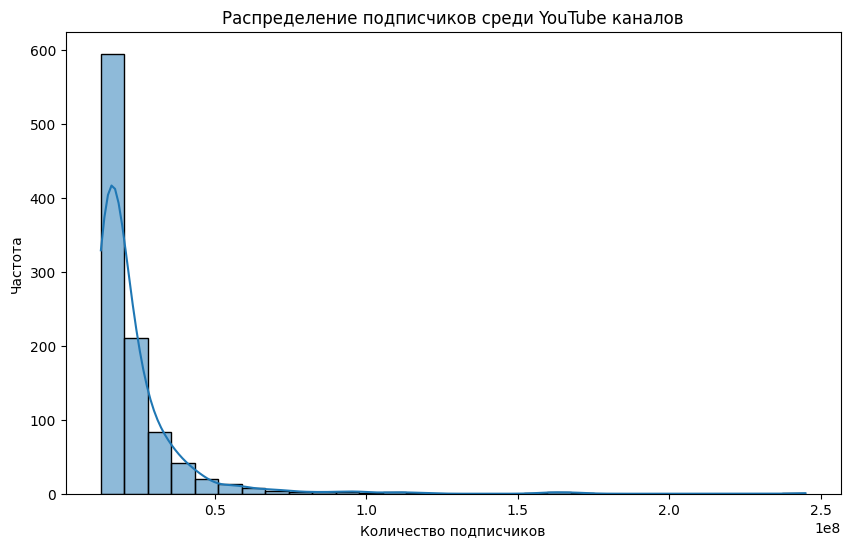

In [ ]:
# Распределение подписчиков
plt.figure(figsize=(10, 6))
sns.histplot(df['subscribers'].astype(float), bins=30, kde=True)
plt.title('Распределение подписчиков среди YouTube каналов')
plt.xlabel('Количество подписчиков')
plt.ylabel('Частота')
plt.show()

Какое распределение общего количества просмотров видео?

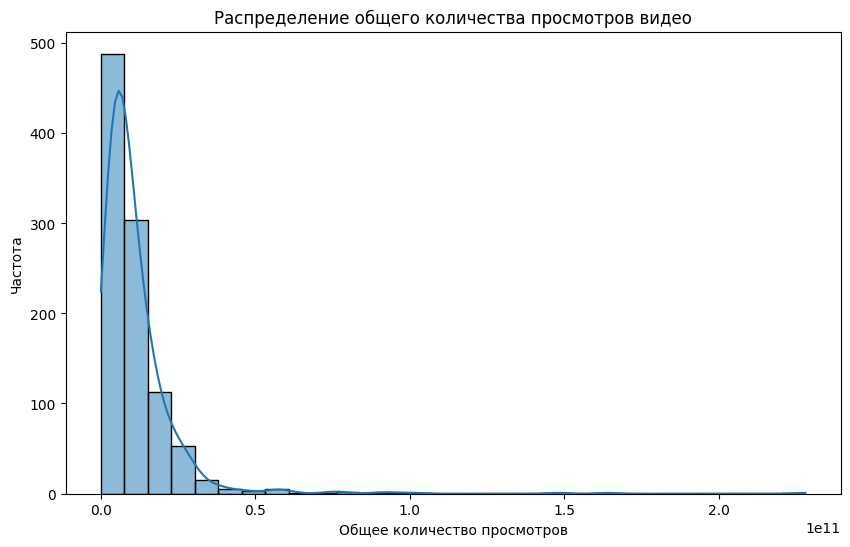

In [43]:
# Распределение общего количества просмотров видео
plt.figure(figsize=(10, 6))
sns.histplot(df['video views'].astype(float), bins=30, kde=True)
plt.title('Распределение общего количества просмотров видео')
plt.xlabel('Общее количество просмотров')
plt.ylabel('Частота')
plt.show()

Какова средняя заработная плата каналов?

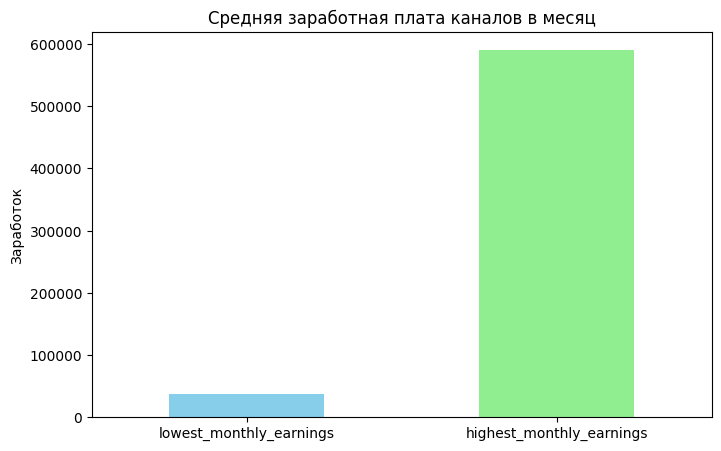

In [ ]:
# Средняя заработная плата каналов
monthly_earnings = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].astype(float)
monthly_earnings.mean().plot(kind='bar', figsize=(8, 5), color=['skyblue', 'lightgreen'])
plt.title('Средняя заработная плата каналов в месяц')
plt.ylabel('Заработок')
plt.xticks(rotation=0)
plt.show()

Какова связь между количеством подписчиков и общим количеством просмотров?

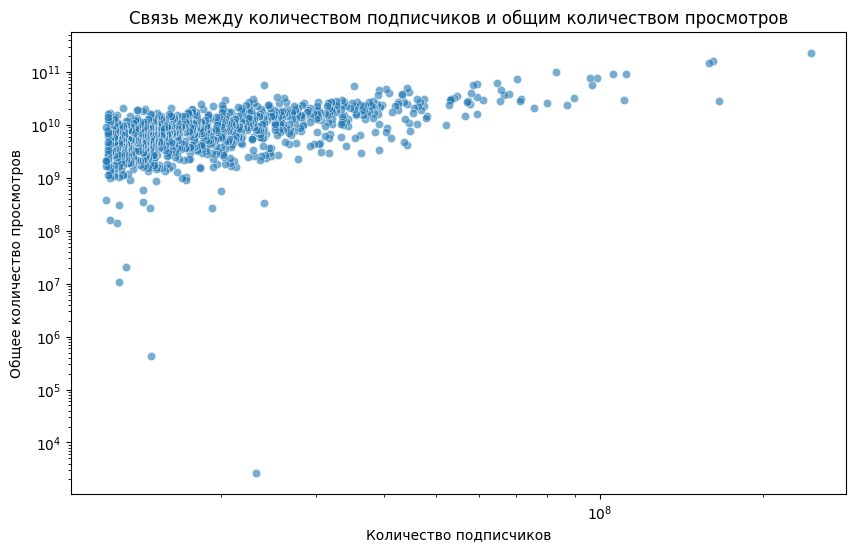

In [ ]:
# Связь между количеством подписчиков и общим количеством просмотров
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subscribers', y='video views', alpha=0.6)
plt.title('Связь между количеством подписчиков и общим количеством просмотров')
plt.xlabel('Количество подписчиков')
plt.ylabel('Общее количество просмотров')
plt.xscale('log')
plt.yscale('log')
plt.show()

Как распределены каналы по категориям?

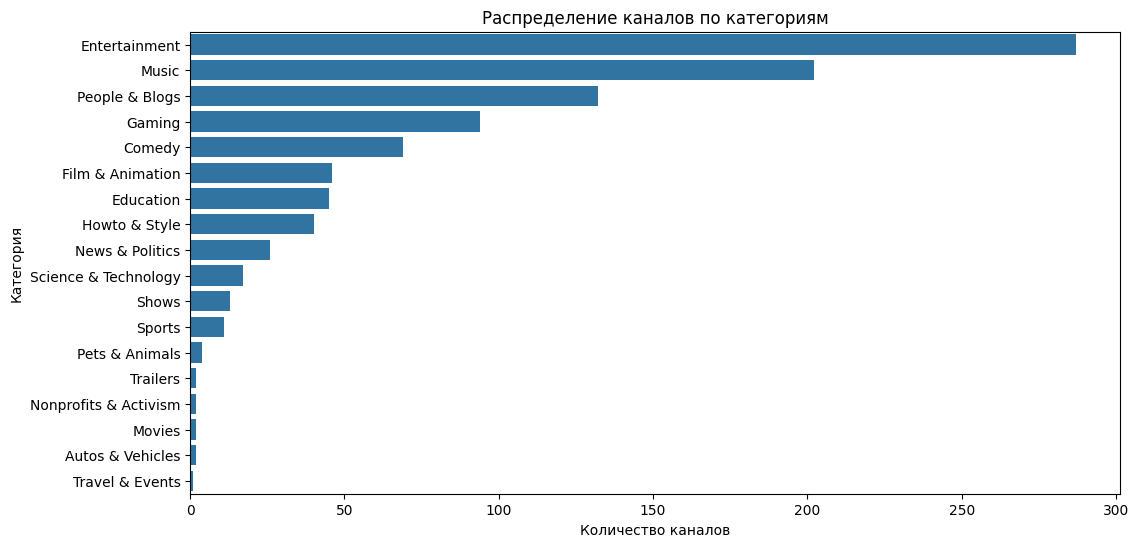

In [46]:
# Распределение каналов по категориям
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Распределение каналов по категориям')
plt.xlabel('Количество каналов')
plt.ylabel('Категория')
plt.show()

Какова зависимость между количеством загруженных видео и количеством подписчиков?

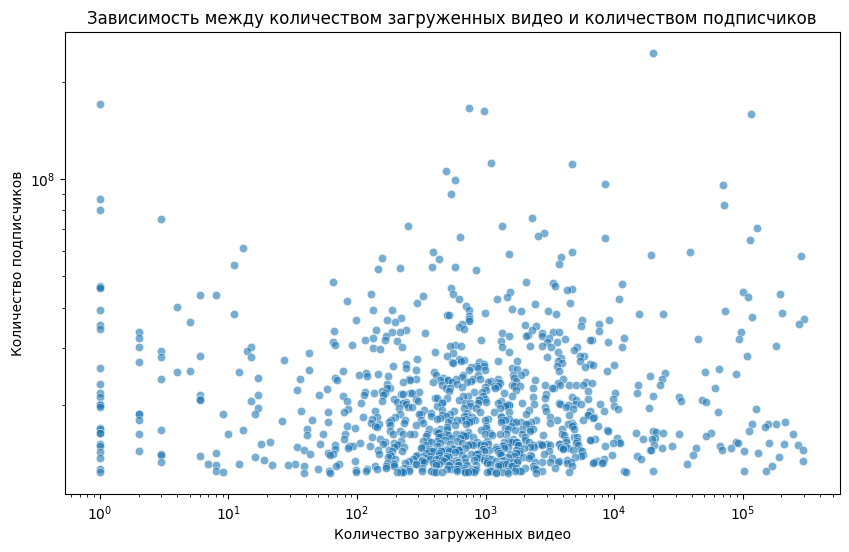

In [49]:
# Зависимость между количеством загруженных видео и количеством подписчиков
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='uploads', y='subscribers', alpha=0.6)
plt.title('Зависимость между количеством загруженных видео и количеством подписчиков')
plt.xlabel('Количество загруженных видео')
plt.ylabel('Количество подписчиков')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Корреляция между числовыми показателями

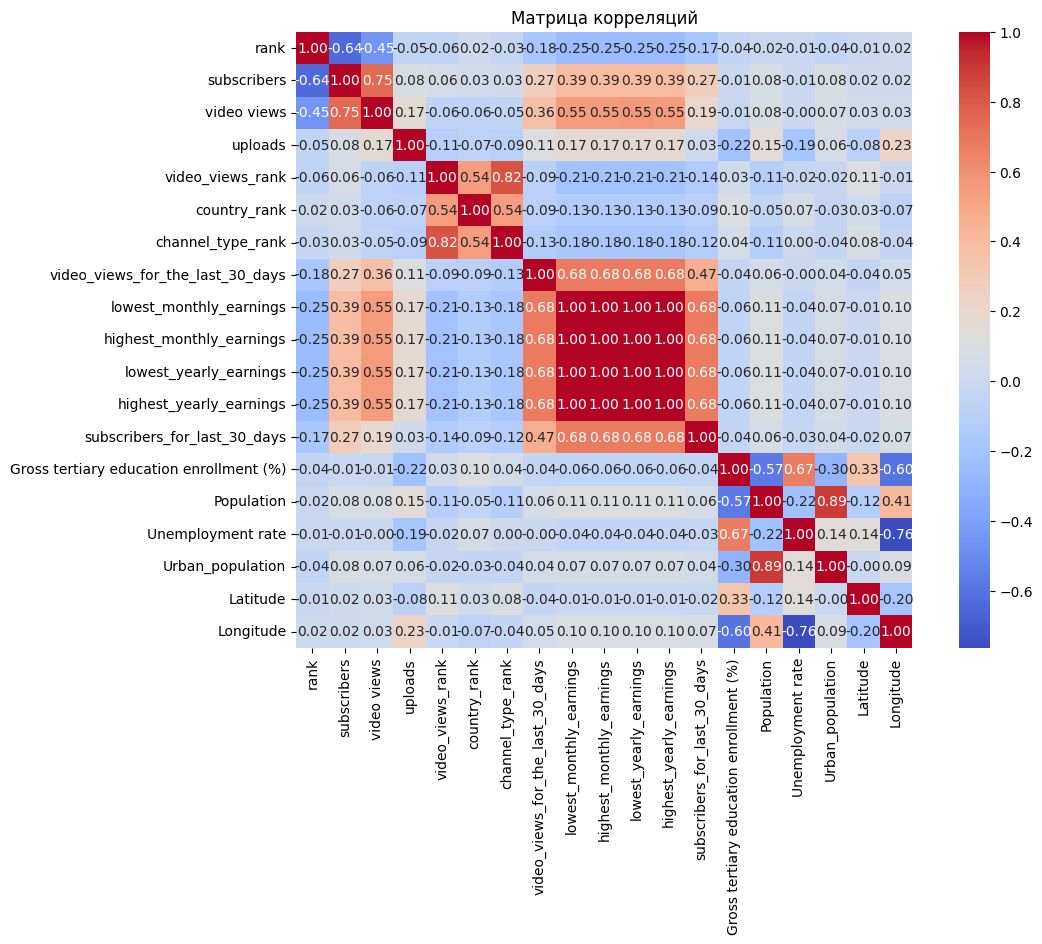

In [ ]:
# датафрейм с только числовыми колонками
df_numeric = df[numeric_cols].copy()
# Вычисление корреляционной матрицы
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций')
plt.show()

### Задание 2. Корреляционный анализ

Оставьте два коррелирующих столбца: "subscribers" и"video views".
Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
Рассчитайте коэффициент корреляции Пирсона.
Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
Разделите выборку на тестовую и тренировочную.
Постройте модель линейной регрессии.
Рассчитайте точность модели на тестовой выборке.
Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [50]:
# Оставляем два коррелирующих столбца
df_filtered = df[['subscribers', 'video views']]
# Убираем строки, где количество просмотров равно нулю
df_filtered = df_filtered[df_filtered['video views'] > 0]
# Рассчитываем коэффициент корреляции Пирсона
correlation = df_filtered['subscribers'].corr(df_filtered['video views'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")

Коэффициент корреляции Пирсона: 0.82


In [53]:
# Определяем "video views" как признак X, а "subscribers" - как целевую переменную
X = df_filtered[['video views']]
y = df_filtered['subscribers']
# Разделяем выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Рассчитываем точность модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Среднеквадратичная ошибка: 69261160622424.80
Коэффициент детерминации (R²): 0.42


 Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [54]:
# Если не убрать строки с нулевыми просмотрами, это может значительно повлиять на результаты модели.
# Нулевые исказят данные и снизят точность, ввиду добавления шума.
# Тем самым уменьшат корреляцию между количеством подписчиков и просмотрами.

# Определяем признаки и целевую переменную без фильтрации
X_full = df[['video views']]
y_full = df['subscribers']

# Разделение на тренировочную и тестовую выборки (без фильтрации)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

# Предсказание на тестовой выборке
y_pred_full = model_full.predict(X_test_full)

# Рассчитываем точность модели
mse_full = mean_squared_error(y_test_full, y_pred_full)
r2_full = r2_score(y_test_full, y_pred_full)

print(f"Среднеквадратичная ошибка без фильтрации: {mse_full:.2f}")
print(f"Коэффициент детерминации (R²) без фильтрации: {r2_full:.2f}")

Среднеквадратичная ошибка без фильтрации: 70915829314711.91
Коэффициент детерминации (R²) без фильтрации: 0.47


### Задание 3. Классификация

1. Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
2. В качестве признаков используйте следующие столбцы: ['video views', 'subscribers', 'uploads']
3. Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
4. Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder (sklearn.preprocessing.LabelEncoder).
5. Разделите выборку на тестовую и тренировочную, укажите random_state=13.
6. Постройте модель логистической регрессии.
7. Рассчитайте точность модели на тестовой выборке.
8. Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [67]:
# Определяем две самые популярные категории
top_categories = df['category'].value_counts().nlargest(2).index.tolist()

# Фильтруем данные по этим категориям
df_filtered = df[df['category'].isin(top_categories)]

# Определяем признаки
features = df_filtered[['video views', 'subscribers', 'uploads']]

# Убираем строки, где количество просмотров равно нулю
df_filtered = df_filtered[df_filtered['video views'] > 0]
features = features[features['video views'] > 0]

# Кодируем целевую переменную с помощью LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_filtered['category'])

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=13)

# Создаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Рассчитываем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.2f}")

Точность модели на тестовой выборке: 0.63


Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [ ]:
# Пример использования признаков subscribers и uploads
features_alternative = df_filtered[['subscribers', 'uploads']]

# Разделение на тренировочную и тестовую выборки
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(features_alternative, y, test_size=0.2, random_state=13)

# Создаем и обучаем модель логистической регрессии
model_alt = LogisticRegression()
model_alt.fit(X_train_alt, y_train_alt)

# Предсказание на тестовой выборке
y_pred_alt = model_alt.predict(X_test_alt)

# Рассчитываем точность модели
accuracy_alt = accuracy_score(y_test_alt, y_pred_alt)
print(f"Точность модели с альтернативными признаками: {accuracy_alt:.2f}")

# Итого:
# точность модели меняется, при использовании других признаков

Точность модели с альтернативными признаками: 0.52
